Bethe ansatz solver for the inverse square potential.

Set up

In [58]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 20 21:31:20 2022

@author: Darren
"""

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#Size of the box
L=40
#Density d = N/L, N is the number of particles in the system
densities = np.linspace(0, 2, 80)

#The integers/quantum numbers
def Is(N):
    if N%2 == 0:
        arr1 = np.linspace(1/2, (N-1)/2, int(N/2))
        arr2 = np.negative(np.flip(np.linspace(1/2, (N-1)/2, int(N/2))))
        arr = np.concatenate((arr2, arr1))
    else:
        arr1 = np.linspace(0, (N-1)/2, int((N+1)/2))
        arr2 = np.negative(np.flip(np.linspace(1, (N-1)/2, int(N/2))))
        arr = np.concatenate((arr2, arr1))
    return arr


#Phase shift (inverse square λ(λ-1)/r^2)
def θ(x):
    if x==0:
        p=0
    if x>0:
        p = +np.pi*(λ-1)
    if x<0:
        p = -np.pi*(λ-1)
    return p


#Bethe ansatz equations
def BAeqs(x):
    arr =[]
    #for k in c:
    eqs = []
    for i in range(N):
        sums=0
        for j in range(N):
            if j!=i:
                sums += θ(x[i]-x[j])
        arr.append(x[i]-2*np.pi/L * Is(N)[i] - sums/L)
    return arr

#Total energy
def energy(p):
    return 0.5*np.sum(np.square(p))

#Total momentum
def momentum(p):
    return np.sum(p)


Known exact solution

In [64]:
def solution(x):
    return np.pi*2*x**3*λ**2/6

Solving

In [60]:
e0 = []
ks = []
λs = [0.5, 1, 1.5, 2]
for i in λs:
    arr = []
    for j in range(np.size(densities)):
        arr1 = []
        N = int(densities[j] * L)
        λ = i
        init = 2*np.pi*Is(N)/L
        if N!=0:
            #k = optimize.newton_krylov(BAeqs, init, iter = 100, method = 'minres')#gmres minres
            sol = optimize.root(BAeqs, init, method = 'hybr')
            k = sol.x
        else:
            k=0
        arr1.append([k])
        enr = energy(k)/L
        mom = momentum(k)
        arr.append(enr)
    ks.append(arr1)
    e0.append(arr)


Plotting

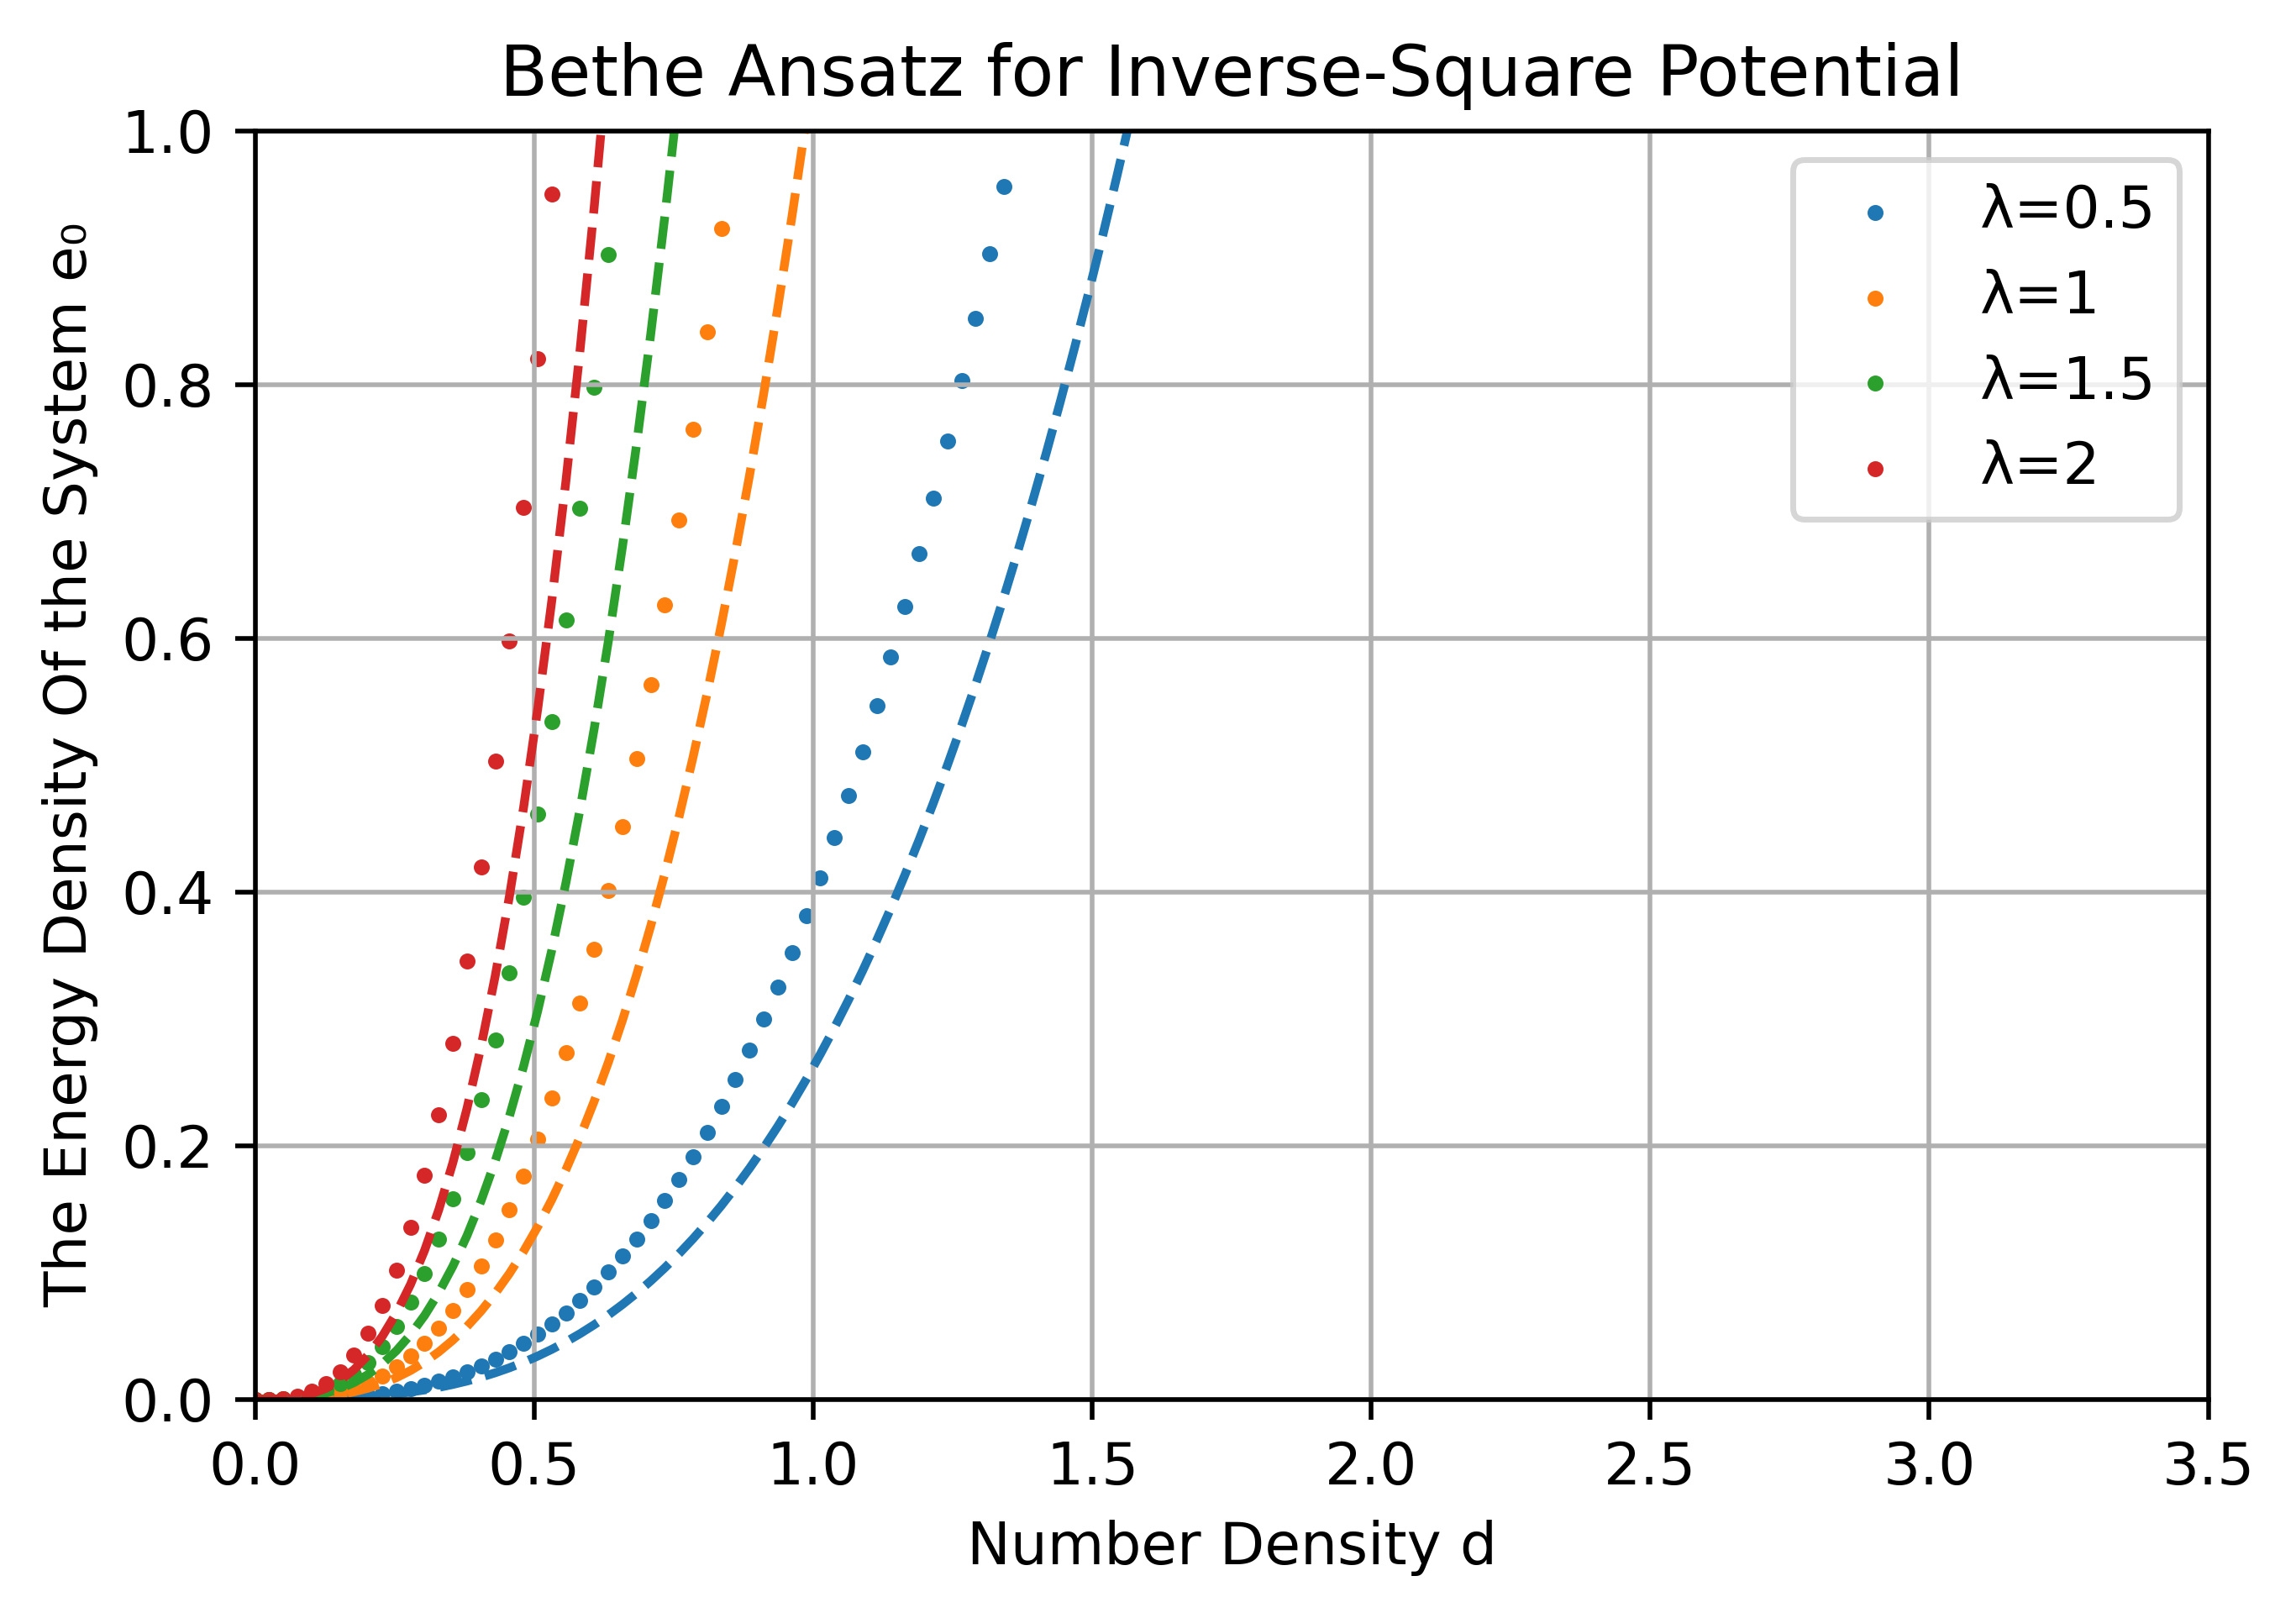

In [65]:
plt.figure(dpi=500)
plt.xlabel('Number Density d')
plt.ylabel('The Energy Density Of the System e₀')
plt.title('Bethe Ansatz for Inverse-Square Potential')

for i in range(np.size(λs)):
    plt.scatter(densities, e0[i], label = "λ=%g"%λs[i], s = 3)
for i in λs:
    λ = i
    plt.plot(densities, solution(densities), ms = 1, linestyle = 'dashed')

plt.grid()
plt.legend()
plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.show()